In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("Insurance Dataset.csv")
data

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,2800,26,233,3890.076336,28000
1,2950,27,130,2294.444444,29500
2,3100,28,144,2564.545455,31000
3,3250,30,65,1978.260870,32500
4,3400,32,56,2009.090909,34000
...,...,...,...,...,...
95,25575,63,76,16161.979170,170500
96,25800,62,166,23715.151520,172000
97,26025,59,167,24043.401020,173500
98,26250,58,245,40147.058820,175000


In [8]:
# Checking the number of Rows and Columns of the dataset

data.shape

(100, 5)

In [50]:
# Analysing the data for the five - Numbers summery of the data

data.describe()

,Premiums Paid,Age,Days to Renew,Claims made,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,12542.250000,46.110000,120.400000,12578.993367,102250.000000
std,6790.731666,13.887641,88.055767,13695.906762,43517.237964
min,2800.000000,23.000000,1.000000,1978.260870,28000.000000
25%,6975.000000,34.000000,56.000000,5220.648735,65125.000000
50%,11825.000000,45.000000,89.000000,8386.043907,102250.000000
75%,15475.000000,54.500000,186.500000,14670.889520,139375.000000
max,29900.000000,82.000000,321.000000,99676.744190,176500.000000


In [48]:
# Analysing the data for the dtype of the columns and null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Premiums Paid  100 non-null    int64  
 1   Age            100 non-null    int64  
 2   Days to Renew  100 non-null    int64  
 3   Claims made    100 non-null    float64
 4   Income         100 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.0 KB


In [49]:
data

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,2800,26,233,3890.076336,28000
1,2950,27,130,2294.444444,29500
2,3100,28,144,2564.545455,31000
3,3250,30,65,1978.260870,32500
4,3400,32,56,2009.090909,34000
...,...,...,...,...,...
95,25575,63,76,16161.979170,170500
96,25800,62,166,23715.151520,172000
97,26025,59,167,24043.401020,173500
98,26250,58,245,40147.058820,175000


In [46]:
# Analyzing the correlation of the features 

data[list(data.columns[1:])].corr()

,Age,Days to Renew,Claims made,Income
Age,1.000000,0.118577,0.331819,0.309009
Days to Renew,0.118577,1.000000,0.654598,0.090823
Claims made,0.331819,0.654598,1.000000,0.492533
Income,0.309009,0.090823,0.492533,1.000000


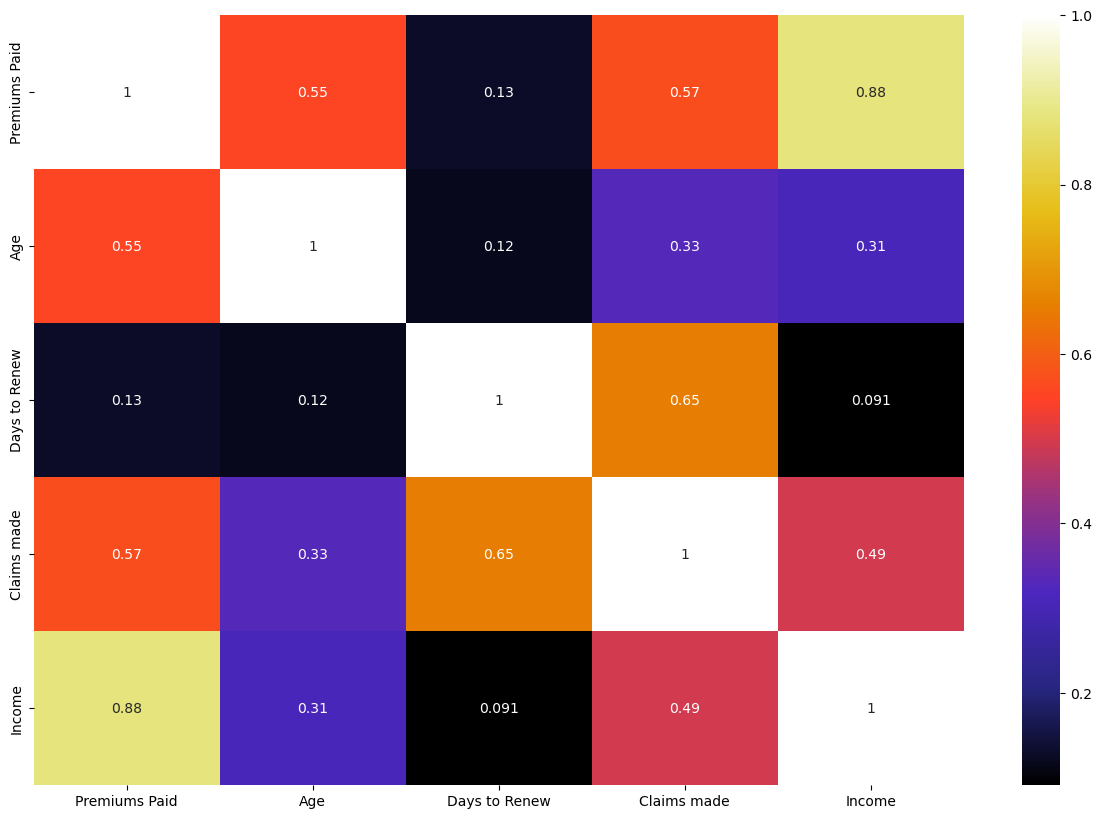

In [44]:
# Plotting the heatmap for the corelation of the features in between 

plt.figure(figsize=(15,10))

sns.heatmap(data.corr(), cmap = "CMRmap", annot = True)
plt.show()

In [45]:
# checking for the null values 


data.columns.isnull().sum()

0

# Applying KMeans clustering for the dataset 

In [54]:
from sklearn.cluster import KMeans

In [55]:
data

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,2800,26,233,3890.076336,28000
1,2950,27,130,2294.444444,29500
2,3100,28,144,2564.545455,31000
3,3250,30,65,1978.260870,32500
4,3400,32,56,2009.090909,34000
...,...,...,...,...,...
95,25575,63,76,16161.979170,170500
96,25800,62,166,23715.151520,172000
97,26025,59,167,24043.401020,173500
98,26250,58,245,40147.058820,175000


In [56]:
# first normalizing the data 

def norm_funt(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [57]:
norm_data = norm_funt(data)
norm_data

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,0.000000,0.050847,0.725000,0.019569,0.000000
1,0.005535,0.067797,0.403125,0.003236,0.010101
2,0.011070,0.084746,0.446875,0.006001,0.020202
3,0.016605,0.118644,0.200000,0.000000,0.030303
4,0.022140,0.152542,0.171875,0.000316,0.040404
...,...,...,...,...,...
95,0.840406,0.677966,0.234375,0.145178,0.959596
96,0.848708,0.661017,0.515625,0.222490,0.969697
97,0.857011,0.610169,0.518750,0.225849,0.979798
98,0.865314,0.593220,0.762500,0.390680,0.989899


In [60]:
# Finding the value of the number of the clusters 

ESS = []
k = list(range(1,10))

for i in k:
    model = KMeans(n_clusters=i)
    model.fit(norm_data)
    ESS.append(model.inertia_)
    
ESS

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

[29.64500842336121,
 18.56906591852995,
 14.489148158250371,
 10.799692262703628,
 8.949007079978774,
 7.329507252294514,
 6.562384620859834,
 6.011742913430256,
 5.393318662694583]

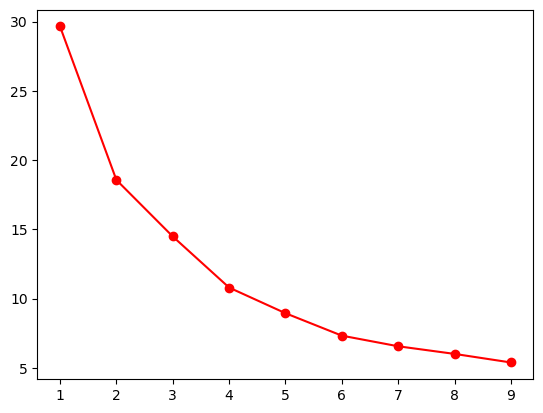

In [63]:
# from obtained data plotting the elbow curve
# for finding the number of cluters 

plt.plot(k, ESS, 'ro-')
plt.show()

In [65]:
# therefore, let the number of the clusters is 3

model = KMeans(n_clusters=3)
model.fit(norm_data)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [66]:
model.labels_

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [69]:
data['clust'] = model.labels_
data

,Premiums Paid,Age,Days to Renew,Claims made,Income,clust
0,2800,26,233,3890.076336,28000,2
1,2950,27,130,2294.444444,29500,0
2,3100,28,144,2564.545455,31000,0
3,3250,30,65,1978.260870,32500,0
4,3400,32,56,2009.090909,34000,0
...,...,...,...,...,...,...
95,25575,63,76,16161.979170,170500,1
96,25800,62,166,23715.151520,172000,1
97,26025,59,167,24043.401020,173500,1
98,26250,58,245,40147.058820,175000,1


In [ ]:
pd.to_csv('')